# 13- How to split a string in multiple columns
### we use this if we have one or  ore than one kind of things in a dataframe

In [1]:
#import libraries
import pandas as pd 
df = pd.DataFrame({'name':['John Doe','Jan Smith', 'Ali Khan', 'Ayaz Ali'],
                  'location':['LosAngeles, USA', 'WashingtonDC, USA', 'Multan, PAK', 'Islamabad, PAK']}) 
df

,name,location
0,John Doe,"LosAngeles, USA"
1,Jan Smith,"WashingtonDC, USA"
2,Ali Khan,"Multan, PAK"
3,Ayaz Ali,"Islamabad, PAK"


In [2]:
#Now we will split the data because most of the time data comes in the form of columns,
# so we need to split it into different ways to utilizie it efficiently
df.name.str.split(' ').head()

#In output you can see that it split the names

0     [John, Doe]
1    [Jan, Smith]
2     [Ali, Khan]
3     [Ayaz, Ali]
Name: name, dtype: object

In [3]:
#Now if needs to expand the data
#Spliting a column into two columns
df.name.str.split(' ', expand=True)

#in output it splits the data by spliting the first and last names

,0,1
0,John,Doe
1,Jan,Smith
2,Ali,Khan
3,Ayaz,Ali


In [4]:
#Now adding above splits into new columns
df[['first_name', 'last_name']] = df.name.str.split(' ', expand=True)
df

,name,location,first_name,last_name
0,John Doe,"LosAngeles, USA",John,Doe
1,Jan Smith,"WashingtonDC, USA",Jan,Smith
2,Ali Khan,"Multan, PAK",Ali,Khan
3,Ayaz Ali,"Islamabad, PAK",Ayaz,Ali


# Assignment

In [5]:
#Now we will split the data because most of the time data comes in the form of columns,
# so we need to split it into different ways to utilizie it efficiently
df.location.str.split(' ').head()

#In output you can see that it split the names

0      [LosAngeles,, USA]
1    [WashingtonDC,, USA]
2          [Multan,, PAK]
3       [Islamabad,, PAK]
Name: location, dtype: object

In [6]:
#Now if needs to expand the data
#Spliting a column into two columns
df.location.str.split(' ', expand=True)

#in output it splits the data by spliting the first and last names

,0,1
0,"LosAngeles,",USA
1,"WashingtonDC,",USA
2,"Multan,",PAK
3,"Islamabad,",PAK


In [7]:
#Now adding above splits into new columns
df[['city', 'country']] = df.location.str.split(' ', expand=True)
df

,name,location,first_name,last_name,city,country
0,John Doe,"LosAngeles, USA",John,Doe,"LosAngeles,",USA
1,Jan Smith,"WashingtonDC, USA",Jan,Smith,"WashingtonDC,",USA
2,Ali Khan,"Multan, PAK",Ali,Khan,"Multan,",PAK
3,Ayaz Ali,"Islamabad, PAK",Ayaz,Ali,"Islamabad,",PAK


In [8]:
#Refine data manipulation
df= df[['first_name', 'last_name', 'city', 'country']]
df

#these technoques are important for people who work on time series

,first_name,last_name,city,country
0,John,Doe,"LosAngeles,",USA
1,Jan,Smith,"WashingtonDC,",USA
2,Ali,Khan,"Multan,",PAK
3,Ayaz,Ali,"Islamabad,",PAK


# 14- Aggregate by multiple groups/funcions

In [9]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns 

#import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
#How to group the data with multiple check functions
df.groupby('who').count()

#output shows the only data of "who" column with its components in dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [11]:
#If you want to check the sum
df.groupby('who').sum()

#output shows the sum of each variable in dataset

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [12]:
#Now if you want to check the length:
len(df.groupby('who'))

#output 3 shows(child, man, women) you can check with other components also

3

In [13]:
#How to group the data with multiple check functions
df.groupby(['sex', 'pclass', 'who']).count()

#output shows the data of different grouped columns with its components in dataset
#grouped on the basis of sex invloving their classes and gender

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  
sex    pclass who                                                 
female 1      child           3     3            3      3      3  
              woman          91    78           89     91     91  
       2      child          10     1           10     10     10  
              woman          66     9           66     66     66  
       3      child          30     2           30     30     30  
              woman         114     4          114    114    114  
male   1      child           3     3            3      3      3  
              man           119    91          119    119    119  
       2      child           9     3            9      9      9  
              man            99     3           99     99     99  
       3      child          28     1           28     28     28  
              man           319     5          319    319    319

# 15- How to select specific rows and columns

In [14]:
# Selecting columns
df.head()
df[['sex', 'age', 'survived']]

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
...,...,...,...
886,male,27.0,0
887,female,19.0,1
888,female,NaN,0
889,male,26.0,1


In [15]:
# Selecting rows
df.describe()
df.describe().loc[['min', '25%', '50%', '75%', 'max']]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [16]:
# Another way to Select rows
df.describe()
df.describe().loc['count':'max']

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Selecting rows and columns together
df.describe()
df.describe().loc['count':'max', 'survived']
#df.describe().loc['count':'max', 'survived':'fare'] > if you need to select all

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

# 16- How to reshape multiindex series

In [18]:
#load dataset
df.head()

#we have titanic data set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
#To check the mean
df.survived.mean()

0.3838383838383838

In [20]:
#if you want to check the mean of one column but different class:
df.groupby('sex').survived.mean()

#Output is mean or survivd but grouped by variables of sex column(male, female)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [21]:
#if you want to check the mean of multiple column but different class:
df.groupby(['sex', 'class']).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [22]:
#To convert convinient reshape multiindex series into data frame
df.groupby(['sex', 'class']).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 17- Conversion of continuous data to catagorical data

In [23]:
#Check dataset (column) which is continous
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
#we have (age) as a continous variable
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [25]:
#creating bins
pd.cut(df.age, bins= [0, 10, 18, 40, 60], labels= ['child', 'young', 'adult', 'old']).head()

#output shows that we have converted age into 4 different kinds

0    adult
1    adult
2    adult
3    adult
4    adult
Name: age, dtype: category
Categories (4, object): ['child' < 'young' < 'adult' < 'old']

In [26]:
#after changing if you want to see the new column of age group then:
df['new_age'] = pd.cut(df.age, bins= [0, 10, 18, 40, 60], labels= ['child', 'young', 'adult', 'old'])
df.head()

#You can see in output a new column of new_age has been added to dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


# 18- How to convert one set of values into another one

In [27]:
#we will chnage string into contnous or number
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [28]:
df.sex.map({'male': 0, 'female': 1})
#in output male is chnaged with "0" and female with '1'

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [29]:
# now check the conversion (feature enginerring) as a new column in the dataset
df['sex_num']= df.sex.map({'male': 0, 'female': 1})
df.head()

#check output (last column)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [30]:
#hot encoding (for multiple numbers)
#if there are many objects and you want to change, then no need to write their names,
# everytime, just factorize in the following way
df.embarked.head()
#there are three kind of objects (S, C,S)
df.embarked.unique()
#
df['embarked_num']= df.embarked.factorize()[0]
#here 0 in brackets "[0]" means that first will be 0,
# rest of them will change accordingly to 1 and 2, check the output as a last column
df.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,0,2
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,old,0,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child,0,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,adult,1,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,young,1,1


# 19- Transpose a wide dataframe
### transpose (convert rows into columns and vice versa)

In [31]:
#import libraries
import numpy as np 
import pandas as pd

#creating a new dataframe
df = pd.DataFrame(np.random.rand(200,25), columns=list('abcdefghijklmnopqrstuvwxy'))
df.head(10)
# here (200,25) means 200 rows and 25 columns

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.983041,0.446365,0.271146,0.153064,0.795476,0.132782,0.030694,0.699621,0.426957,0.572414,...,0.408040,0.169722,0.450433,0.237055,0.737318,0.530326,0.880348,0.008154,0.456436,0.660481
1,0.893682,0.199482,0.492893,0.696501,0.438265,0.068384,0.470785,0.487419,0.962996,0.252707,...,0.257339,0.844909,0.414663,0.374919,0.613623,0.548689,0.085649,0.236567,0.500157,0.211075
2,0.207521,0.239465,0.865535,0.548496,0.476184,0.188778,0.923681,0.154914,0.645988,0.877671,...,0.097825,0.977138,0.653556,0.577358,0.309460,0.405839,0.605654,0.302159,0.473240,0.715253
3,0.600309,0.974655,0.310817,0.983244,0.406989,0.048547,0.957158,0.204218,0.959997,0.593257,...,0.536769,0.337273,0.964283,0.289725,0.466205,0.115337,0.530836,0.512204,0.903896,0.291957
4,0.916457,0.073710,0.949311,0.458778,0.489951,0.976680,0.916655,0.002541,0.757214,0.150470,...,0.454425,0.632697,0.874259,0.887208,0.173954,0.836789,0.959335,0.443122,0.291368,0.359101
5,0.502962,0.581372,0.970790,0.769855,0.741013,0.133433,0.689655,0.824168,0.096141,0.928238,...,0.181243,0.004544,0.647263,0.697484,0.867734,0.367641,0.629341,0.803007,0.087682,0.555550
6,0.322295,0.862851,0.455142,0.913962,0.953956,0.351868,0.990734,0.682486,0.439260,0.113952,...,0.546740,0.007985,0.626407,0.399847,0.780613,0.312665,0.152441,0.349221,0.706778,0.742749
7,0.874046,0.344949,0.795655,0.371436,0.253331,0.695177,0.447237,0.547173,0.070647,0.425684,...,0.515452,0.360451,0.415016,0.439677,0.739302,0.861397,0.063771,0.004939,0.745914,0.877383
8,0.636589,0.569320,0.206791,0.417861,0.357265,0.018252,0.416131,0.633434,0.362730,0.175039,...,0.213226,0.542723,0.542541,0.071054,0.230912,0.351885,0.917190,0.721520,0.577961,0.378250
9,0.233968,0.215459,0.344149,0.910877,0.766291,0.769920,0.607416,0.054750,0.518791,0.092417,...,0.864123,0.534221,0.618992,0.926183,0.013615,0.371906,0.459174,0.397934,0.355835,0.655091


In [32]:
#transpose the data (columns into rows)
df.head(200).T

#you can also save you data after transposing into xl or csv > (df.head(200).T.to_csv('data.csv')
#used for better understaning and easy to deal with large datasets

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
a,0.983041,0.893682,0.207521,0.600309,0.916457,0.502962,0.322295,0.874046,0.636589,0.233968,...,0.307632,0.552464,0.178610,0.661756,0.140707,0.621715,0.029578,0.823567,0.379961,0.597253
b,0.446365,0.199482,0.239465,0.974655,0.073710,0.581372,0.862851,0.344949,0.569320,0.215459,...,0.833281,0.094802,0.601858,0.279180,0.367310,0.612179,0.892589,0.526175,0.154642,0.146273
c,0.271146,0.492893,0.865535,0.310817,0.949311,0.970790,0.455142,0.795655,0.206791,0.344149,...,0.871989,0.753561,0.047378,0.350648,0.323124,0.635568,0.752718,0.320239,0.749993,0.751489
d,0.153064,0.696501,0.548496,0.983244,0.458778,0.769855,0.913962,0.371436,0.417861,0.910877,...,0.384763,0.275470,0.724594,0.183694,0.916179,0.614704,0.466375,0.161818,0.652763,0.092715
e,0.795476,0.438265,0.476184,0.406989,0.489951,0.741013,0.953956,0.253331,0.357265,0.766291,...,0.643968,0.970726,0.687197,0.004293,0.204107,0.030473,0.478813,0.271901,0.764395,0.488417
f,0.132782,0.068384,0.188778,0.048547,0.976680,0.133433,0.351868,0.695177,0.018252,0.769920,...,0.554548,0.118940,0.969182,0.735885,0.730257,0.727467,0.816402,0.321814,0.407420,0.775208
g,0.030694,0.470785,0.923681,0.957158,0.916655,0.689655,0.990734,0.447237,0.416131,0.607416,...,0.196734,0.889791,0.402583,0.041398,0.520419,0.669140,0.046520,0.513826,0.255101,0.140376
h,0.699621,0.487419,0.154914,0.204218,0.002541,0.824168,0.682486,0.547173,0.633434,0.054750,...,0.230443,0.340946,0.358317,0.116411,0.195326,0.842070,0.090178,0.316388,0.448937,0.221928
i,0.426957,0.962996,0.645988,0.959997,0.757214,0.096141,0.439260,0.070647,0.362730,0.518791,...,0.720280,0.433744,0.748708,0.927150,0.021238,0.749602,0.908203,0.681318,0.188911,0.996814
j,0.572414,0.252707,0.877671,0.593257,0.150470,0.928238,0.113952,0.425684,0.175039,0.092417,...,0.529210,0.875393,0.175829,0.137999,0.256238,0.161082,0.064743,0.638444,0.807739,0.770879


# 20- Reshaping a data frame

In [33]:
#create a dataframe
distance = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]],
                        columns=['zip', 'factory', 'warehouse', 'retail'])
distance

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [34]:
#Dataframe in another simple way
distance2 = pd.DataFrame([[1, '12345', 'factory'], [2, '34567', 'warehouse']],
                      columns=['user_id', 'zip', 'location_type'])
distance2.head()

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehouse


In [35]:
#melting a datset

distance3 = distance.melt(id_vars='zip', var_name='location_type', value_name='distance')
distance3

#output shows that from any location what is the distance on the basis of zip code

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<AxesSubplot:xlabel='zip', ylabel='factory'>

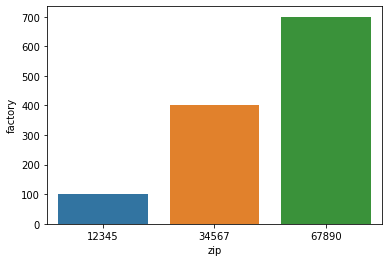

In [36]:
#Plot a graph
#simple barplot
sns.barplot(x='zip', y='factory', data=distance)

<AxesSubplot:xlabel='zip', ylabel='distance'>

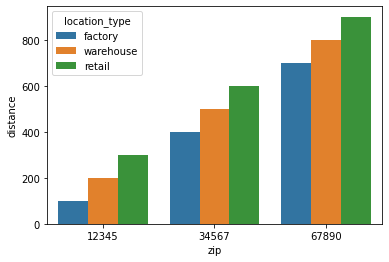

In [40]:
#Plot a graph
#group barplot
import seaborn as sns
sns.barplot(x='zip', y='distance', hue='location_type', data=distance3)